## House Prices: Advanced Regression Techniques : Kaggle Competition

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [3]:
df=pd.read_csv('data_cleaned.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1459, 77)

### Step1: Check for missing values

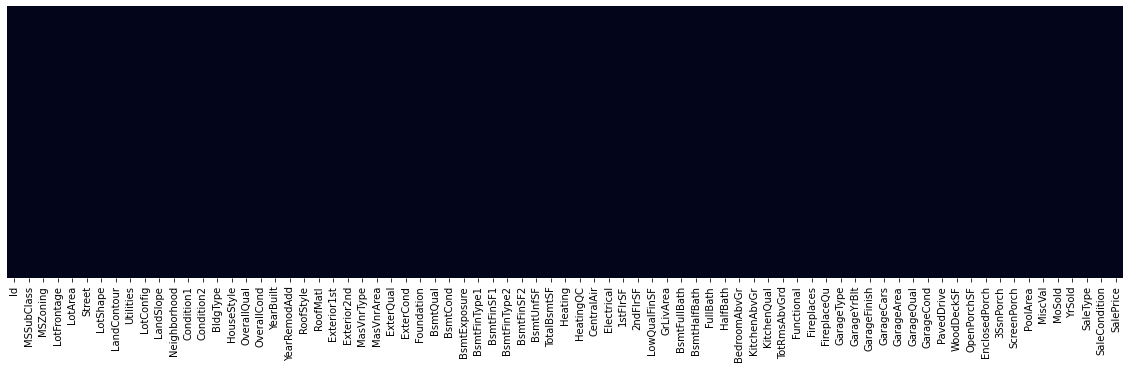

In [6]:
fig, ax = plt.subplots(figsize=(20,5))         # To change fig shape for better representation
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, ax=ax)

In [7]:
def missing_zero_values_table(dataframe):
        zero_val = (dataframe == 0.00).astype(int).sum(axis=0)
        mis_val = dataframe.isnull().sum()
        mis_val_percent = 100 * dataframe.isnull().sum() / len(dataframe)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        zero_val = (dataframe == 0.00).astype(int).sum(axis=0)
        mis_val = dataframe.isnull().sum()
        mis_val_percent = 100 * dataframe.isnull().sum() / len(dataframe)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Data Type'] = dataframe.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(dataframe.shape[1]) + " columns and " + str(dataframe.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [8]:
missing_zero_values_table(df)

Your selected dataframe has 77 columns and 1459 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,1:76]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

In [12]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [13]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [16]:
##HAndle Categorical Features
nums = list(X.select_dtypes(include=['int64','float64']).columns)
nums

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [19]:
Num_data=X[nums]

In [20]:
Num_data.shape

(1459, 36)

In [21]:
Num_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [22]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [23]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Num_data,y)

In [24]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Num_data.columns)


In [25]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [26]:
featureScores

,Specs,Score
0,MSSubClass,1.929157e+04
1,LotFrontage,5.066724e+03
2,LotArea,1.011442e+07
3,OverallQual,3.779420e+02
4,OverallCond,1.551773e+02
5,YearBuilt,4.449506e+02
6,YearRemodAdd,1.889491e+02
7,MasVnrArea,2.856108e+05
8,BsmtFinSF1,3.994498e+05
9,BsmtFinSF2,3.685835e+05


In [27]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs         Score
2        LotArea  1.011442e+07
33       MiscVal  6.249006e+06
13      2ndFlrSF  4.649813e+05
8     BsmtFinSF1  3.994498e+05
32      PoolArea  3.832987e+05
9     BsmtFinSF2  3.685835e+05
7     MasVnrArea  2.856108e+05
10     BsmtUnfSF  2.747139e+05
14  LowQualFinSF  2.447074e+05
15     GrLivArea  1.968564e+05


In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Num_data,y)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [29]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


[0.02483525 0.04351324 0.04853553 0.03300284 0.02676367 0.03990056
 0.04408249 0.03027903 0.03870876 0.01292535 0.04670646 0.04722901
 0.04877507 0.02817057 0.00215268 0.04852049 0.01537591 0.00760046
 0.01296856 0.01515441 0.02580196 0.00341011 0.03501889 0.01988594
 0.04104767 0.02048138 0.04699127 0.03453803 0.0367555  0.01360586
 0.00329312 0.00992807 0.00079879 0.00613056 0.04650324 0.04060926]


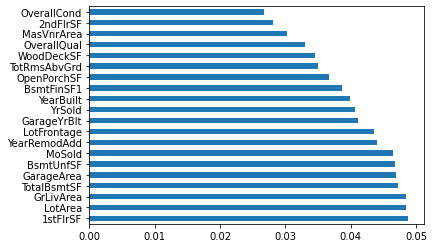

In [33]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Num_data.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [35]:
num_tar_data=pd.concat([Num_data,y],axis=1)
num_tar_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


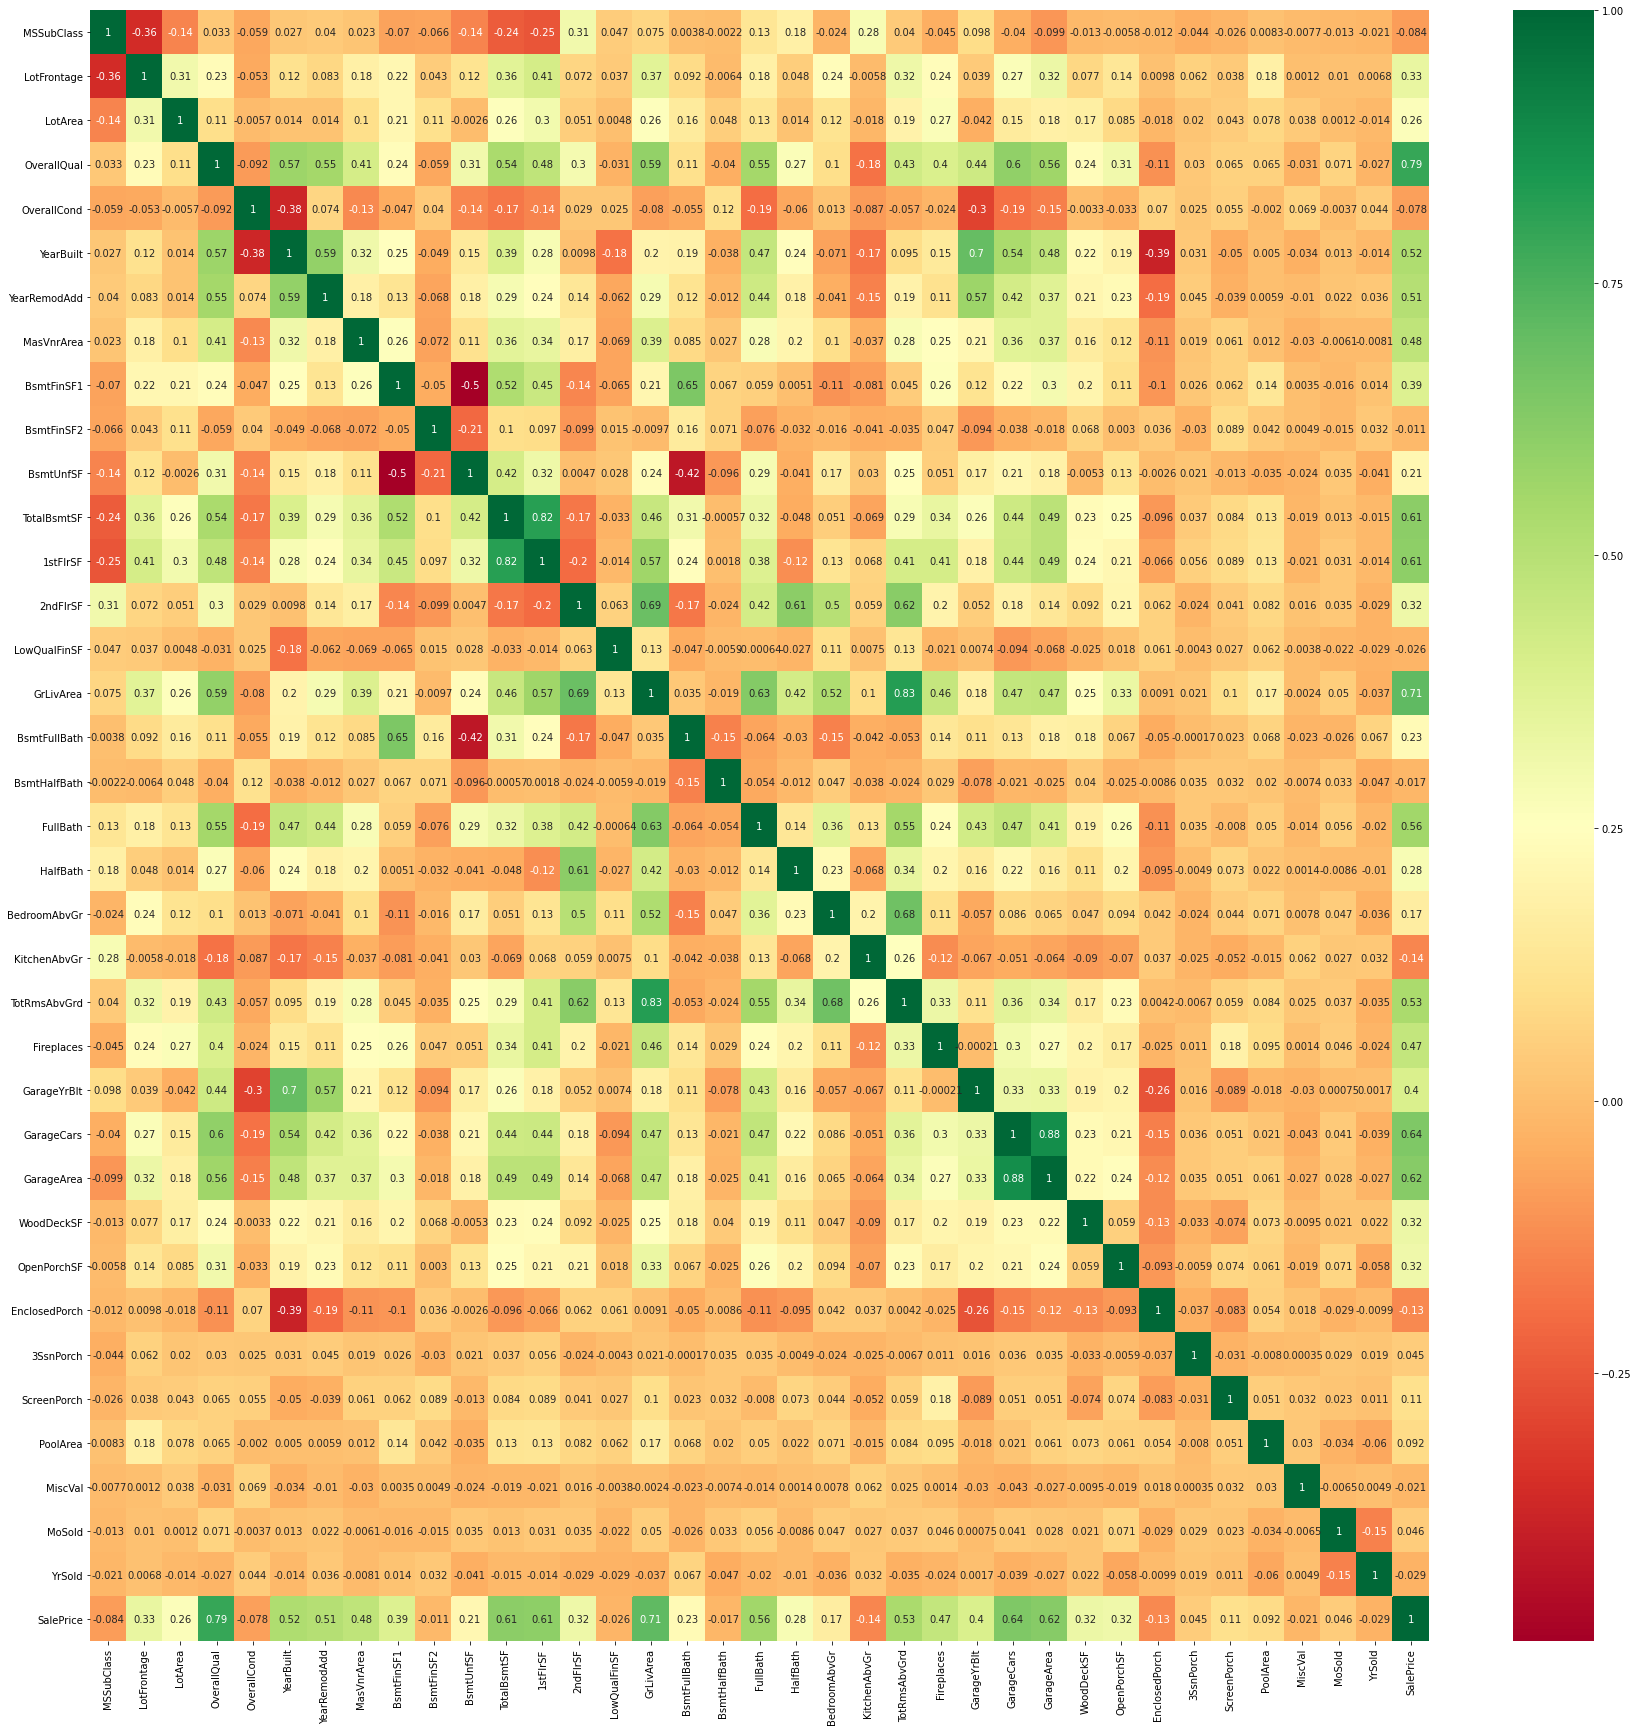

In [39]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = num_tar_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(num_tar_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [46]:
corrmat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357145,-0.139766,0.032936,-0.059134,0.027435,0.040199,0.023115,-0.069501,-0.065549,...,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.007651,-0.013404,-0.021461,-0.084230
LotFrontage,-0.357145,1.000000,0.306804,0.234321,-0.052778,0.117546,0.082680,0.179357,0.215989,0.043368,...,0.077103,0.137543,0.009824,0.062347,0.037710,0.180875,0.001176,0.010204,0.006756,0.334922
LotArea,-0.139766,0.306804,1.000000,0.105786,-0.005665,0.014296,0.013852,0.103941,0.214121,0.111158,...,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.001179,-0.014254,0.263837
OverallQual,0.032936,0.234321,0.105786,1.000000,-0.092243,0.573334,0.551605,0.410058,0.239265,-0.059291,...,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.791069
OverallCond,-0.059134,-0.052778,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.128016,-0.046595,0.040132,...,-0.003318,-0.032847,0.070238,0.025465,0.054721,-0.002009,0.068752,-0.003685,0.044003,-0.077924
YearBuilt,0.027435,0.117546,0.014296,0.573334,-0.375780,1.000000,0.592512,0.315374,0.250465,-0.048903,...,0.224946,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.034330,0.012791,-0.013733,0.523273
YearRemodAdd,0.040199,0.082680,0.013852,0.551605,0.074158,0.592512,1.000000,0.179698,0.129259,-0.067575,...,0.205773,0.226944,-0.193740,0.045389,-0.038558,0.005882,-0.010226,0.021860,0.035656,0.507430
MasVnrArea,0.023115,0.179357,0.103941,0.410058,-0.128016,0.315374,0.179698,1.000000,0.263313,-0.072425,...,0.159386,0.124721,-0.110008,0.018752,0.061356,0.011697,-0.029853,-0.006134,-0.008130,0.475231
BsmtFinSF1,-0.069501,0.215989,0.214121,0.239265,-0.046595,0.250465,0.129259,0.263313,1.000000,-0.050328,...,0.204403,0.111346,-0.102581,0.026382,0.061862,0.140491,0.003514,-0.016060,0.014456,0.386436
BsmtFinSF2,-0.065549,0.043368,0.111158,-0.059291,0.040132,-0.048903,-0.067575,-0.072425,-0.050328,1.000000,...,0.067909,0.002954,0.036475,-0.030017,0.088823,0.041697,0.004923,-0.015309,0.031734,-0.011412


In [82]:
corrmat.shape[0]

37

In [80]:
features_SalePrice=corrmat.iloc[-1:,:]
features_SalePrice

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.08423,0.334922,0.263837,0.791069,-0.077924,0.523273,0.50743,0.475231,0.386436,-0.011412,...,0.324422,0.315831,-0.128627,0.044571,0.111419,0.092397,-0.0212,0.04638,-0.028907,1.0


In [75]:
(features_SalePrice.iloc[:,5])[0]

0.5232730605856432

In [101]:
imp_num_feature=[]
for i in range(0,corrmat.shape[0]-1):
    if(features_SalePrice.iloc[:,i][0]>0.2): #if co-relation value>0.2 its imp feature
        imp_num_feature.append(nums[i])

In [102]:
imp_num_feature

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [103]:
non_num_feature=[]
for i in range(0,corrmat.shape[0]-1):
    if(features_SalePrice.iloc[:,i][0]<0.2): #if co-relation value>0.2 its imp feature
        non_num_feature.append(nums[i])

In [104]:
non_num_feature

['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']